# AM2061 Algorithm 6-3
## Differential Equations - Finite Difference Method

Linear boundary value problems can be described by differential equations of the form:

$$ y'' = p(x) y' + q(x) y + r(x) $$

With $x \in[a, b]$, $y(a) = \alpha$ and $y(b) = \beta$.

The solution can be approximated using a finite difference method that reduces the problem to solving a system of linear equations. If we consider $N + 2$ mesh-points such that $x_i = a + ih$, with $i = 0, 1, 2,..., N + 1$ and $h = \frac{b - a}{N + 1}$, and following the procedure in **Lecture 20** - we get:

$$ -\left( 1 + \frac{h}{2} p(x_i) \right) w_{i-1} + \left (2 + h^2 q(x_i) \right) w_i - \left( 1 - \frac{h}{2} p(x_i) \right) w_{i+1} = -h^2 r(x_i) $$

We can rewrite the above in the form $A w = b$:

\begin{gather*}
\begin{bmatrix}
2+h^2 q(x_1) & -1+\frac{h}{2}p(x_1) & 0 & \dots & \dots & \dots & 0 \\
-1-\frac{h}{2}p(x_2) & 2+h^2 q(x_2) & -1+\frac{h}{2}p(x_2) & \ddots &  &  & \vdots \\
0 & -1-\frac{h}{2}p(x_3) & 2+h^2 q(x_3) & -1+\frac{h}{2}p(x_3) & \ddots &  & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots &  & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots &  &  & \ddots & \ddots & \ddots & -1+\frac{h}{2}p(x_{N-1}) \\
0 & \dots & \dots & \dots & 0 & -1-\frac{h}{2}p(x_N) & 2+h^2 q(x_N)
\end{bmatrix}
\begin{bmatrix}
w_1 \\
w_2 \\
w_3 \\
\vdots \\
\vdots \\
w_{N-1} \\
w_N
\end{bmatrix}
\end{gather*}

\begin{gather*}
=
\begin{bmatrix}
-h^2 r(x_1) + (1 + \frac{h}{2} p(x_1)) w_0 \\
-h^2 r(x_2) \\
\vdots \\
\vdots \\
-h^2 r(x_{N-1}) \\
-h^2 r(x_N) + (1 - \frac{h}{2} p(x_N)) w_{N + 1}
\end{bmatrix}
\end{gather*}

Where we have $w_0 = \alpha$ and $w_{N + 1} = \beta$. We can solve the above in a similar fashion as in Algorithm 4.1.

A brief explanation is as follows:

* We are given the endpoints $a$ and $b$, the initial conditions $\alpha$ and $\beta$, the number of steps $N$
* Find $h$, initialise $x$ and $w$, along with $a_1$, $b_1$ and $d_1$ helper arrays
    * $a$ represents the diagonal along $A$
    * $b$ represents the indices above the diagonal along $A$
    * $c$ represents the indices below the diagonal along $A$
    * $d$ represents the values in the matrix $b$ of $Aw=b$
* Find all values of $a$, $b$, $c$ and $d$ by following the equations in the matrix $A$
  * This allows us to create our Matrices $L$ and $U$
  * Note that $a$, $b$, $c$ and $d$ start at index $1$ and finish at $N$, as opposed to $x$ and $w$ which have extra indices at either end, to factor in the start and end conditions $\alpha$ and $\beta$
* We wish to solve $Aw=b$ as above by LU Decomposition to find $w$
  * Use similar procedure as in Algorithm 3.4, however now we use Crouts Method ($U_{i,i}=1$)
  * We solve $Lz=b$ giving $z$
  * We solve $Uw=z$ giving $w$
  
*Note the difference in notation, this is the same as in Algorithm 3.4*

The following is the pseudocode provided:

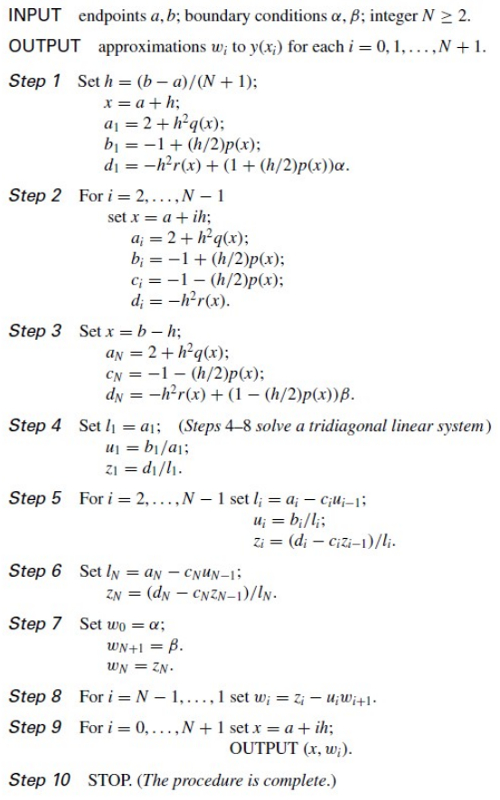

Let us now create this in Python.

First we must define a dataset to work with. I will use what was given in the Example in **Lecture 22**, where we have the following Differential Equation:

$$ y'' = \frac{-2}{x} y' + \frac{2}{x^2} y + \frac{sin \left( ln\left( x \right) \right)}{x^2} $$

With $1 \leq x \leq 2$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1 # use this to set N

a = 1
b = 2
N = int((b - a) / h) - 1
alpha = 1
beta = 2

p = lambda x: -2 / x
q = lambda x: 2 / (x**2)
r = lambda x: np.sin(np.log(x)) / (x**2)

Now let us define the algorithm, we need to pass in the components of the function, endpoints, initial condition, and number of steps.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [2]:
def FiniteDifference(p, q, r, a, b, N, alpha, beta):
    '''
    Usage:
        Approximates the solution to Differential Equations in a given range
    Inputs:
        p: Component of y'
        q: Component of y
        r: Component of x
        a: start-point
        b: end-point
        N: Number of Steps
        alpha: Initial Condition
        beta: Initial Condition
    Outputs:
        x: array of x-values
        w: array of solutions at x-values
    '''
    # Initialise x and w arrays, +1 as we are not counting initial point as a step
    x = np.linspace(a, b, N + 2) # does all the updating x-values parts
    w = np.zeros([N + 2])
    # Set h
    h = (b - a) / (N + 1)
    # Initialise helper arrays, to store various values from the above matrices, ignoring 0 index
    a = np.zeros([N + 1])
    b = np.zeros([N + 1])
    c = np.zeros([N + 1])
    d = np.zeros([N + 1])
    # Use Crout's method to solve the tridiagonal linear system, ignoring 0 index
    l = np.zeros([N + 1]) # Main diagonal of matrix L (below main diagonal are the c coefficients for tridiagonal case)
    u = np.zeros([N + 1]) # Below main diagonal of matrix U (main diagonal is all ones)
    z = np.zeros([N + 1]) # Solution to Lz=b
    
    # Step 1
    a[1] = 2 + (h**2) * q(x[1])
    b[1] = -1 + (h / 2) * p(x[1])
    d[1] = -(h**2) * r(x[1]) + (1 + (h / 2) * p(x[1])) * alpha
    
    # Step 2
    for i in range(2, N):
        a[i] = 2 + (h**2) * q(x[i])
        b[i] = -1 + (h / 2) * p(x[i])
        c[i] = -1 - (h / 2) * p(x[i])
        d[i] = -(h**2) * r(x[i])
    
    # Step 3
    a[N] = 2 + (h**2) * q(x[N]) # note difference in notation as I have used a different N
    c[N] = -1 - (h / 2) * p(x[N])
    d[N] = -(h**2) * r(x[N]) + (1 - (h / 2) * p(x[N])) * beta
    
    # Step 4
    l[1] = a[1]
    u[1] = b[1] / a[1]
    z[1] = d[1] / l[1]
    
    # Step 5
    for i in range(2, N):
        l[i] = a[i] - c[i] * u[i - 1]
        u[i] = b[i] / l[i]
        z[i] = (d[i] - c[i] * z[i - 1]) / l[i]
        
    # Step 6
    l[N] = a[N] - c[N] * u[N - 1]
    z[N] = (d[N] - c[N] * z[N - 1]) / l[N]
    
    # Step 7
    w[0] = alpha # before the vector of w
    w[N + 1] = beta # after the vector of w
    w[N] = z[N]
    
    # Step 8
    for i in range(N - 1, 0, -1):
        w[i] = z[i] - u[i] * w[i + 1]
        
    # Step 9
    return (x, w)

We can now test this algorithm for a solution, which will be returned as a tuple $(x, w)$:

In [3]:
FiniteDifference(p, q, r, a, b, N, alpha, beta)

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 array([1.        , 1.09260052, 1.18704313, 1.28333687, 1.38140205,
        1.48112026, 1.5823599 , 1.68498902, 1.78888175, 1.8939211 ,
        2.        ]))

We can look at the error $| w_i - y(x_i) |$ over each iteration by comparing to the actual values:

In [4]:
actual = np.array([1, 1.0926293, 1.18708484, 1.28338236, 1.38144595, 1.48115942, 
                   1.58239246, 1.68501396, 1.78889853, 1.89392951, 2])

error = np.abs(FiniteDifference(p, q, r, a, b, N, alpha, beta)[1] - actual)

print("Step | Error")
for i in range(len(error)):
    print("{0:2}   | {1:.2e}".format(i, error[i]))

Step | Error
 0   | 0.00e+00
 1   | 2.88e-05
 2   | 4.17e-05
 3   | 4.55e-05
 4   | 4.39e-05
 5   | 3.92e-05
 6   | 3.26e-05
 7   | 2.49e-05
 8   | 1.68e-05
 9   | 8.41e-06
10   | 0.00e+00


## Example: Steady State Heat Equation

Let us use the Finite Difference Method to approximate a solution to the steady-state heat equation describing the heat $u$ in a one-dimensional object (very thin rod) subject to an external heat source $Q(x)$:

$$ -k u''(x) = Q(x) $$

As an example, let $x \in[0, 1.5]$ with boundary conditions $u(0) = u(1.5) = 0$. Assume a thermal conductivity $k$ of $0.1$ (e.g. wood). Let us assume a uniform external heating of $Q(x) = 1$. We must first define all our components and parameters, let us use $N = 100$:

In [5]:
k = 0.1

p = lambda x: 0
q = lambda x: 0
r = lambda x: -1 / k

a = 0
b = 1.5
alpha = 0
beta = 0
N = 100

WE can now apply the Finite Difference Method as before, along with plotting the results. Note that this plot shows how the Heat $u$ changes throughout the length of the rod $x$, from start-point of the rod $a$ to end-point of the rod $b$:

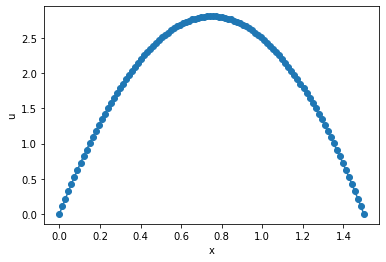

In [6]:
(x, w) = FiniteDifference(p, q, r, a, b, N, alpha, beta)

plt.xlabel('x')
plt.ylabel('u')
plt.plot(x, w, '-o')

What if the heating is non-uniform? Imagine heating from one side of the rod; for example, let $Q(x) = 2 \exp(-5x)$:

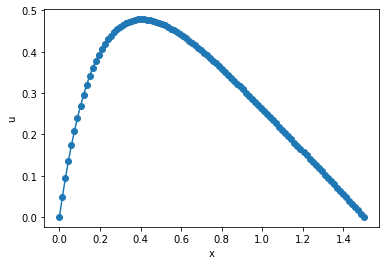

In [7]:
r = lambda x: -2 * np.exp(-5 * x) / k

(x, w) = FiniteDifference(p, q, r, a, b, N, alpha, beta)

plt.xlabel('x')
plt.ylabel('u')
plt.plot(x, w, '-o')

We notice the rod is hotter on one side, as expected.